In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hamro_AB_AS_MB_SM.csv')

In [3]:
df.shape

(3408, 8)

In [4]:
df.describe()

,Price,Road
count,3.408000e+03,3244.000000
mean,1.153894e+14,13.715475
std,4.008551e+15,2.882977
min,1.000000e+00,5.000000
25%,2.400000e+07,13.000000
50%,3.250000e+07,13.000000
75%,5.000000e+07,13.000000
max,2.000000e+17,20.000000


In [9]:
df.tail()

,Price,Address,Floor,Bathroom,Bedroom,Land,Road,Land Mark
3403,15500000.00,गोकर्णेश्वर,NaN,NaN,NaN,NaN,NaN,NaN
3404,45000000.00,Kathmandu > Mandikatar (Dhumbarahi),NaN,NaN,NaN,NaN,NaN,Mandikhatar heights
3405,50000000.00,"Budhanilkantha, Kathmandu",NaN,NaN,NaN,NaN,NaN,NaN
3406,34000000.00,"Sano Bharyang, Kathmandu, Kathmandu Metropolit...",NaN,NaN,NaN,NaN,NaN,NaN
3407,21000000.00,"Achham (Other Area), Achham",NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isna().sum()

Price           0
Address         0
Floor         255
Bathroom      331
Bedroom       337
Land          164
Road          164
Land Mark    2212
dtype: int64

In [12]:
dropped = df.dropna()

In [14]:
dropped

,Price,Address,Floor,Bathroom,Bedroom,Land,Road,Land Mark
5,31500000.00,"Kuti Galli, माइजु बहल, चाबहिल",0,4,6,1369,13.00,chabahil
13,39900000.00,"Budhanilkantha, Kathmandu",0,4,6,0,12.00,budhanilkantha
17,27500000.00,"Milijuli Tol, चप्पल कारखाना",0,3,4,0,13.00,bansbari
21,16500000.00,"Maulo Gade Pokhari, Chandragiri Municipality, ...",0,0,0,855.625,13.00,0
33,13000000.00,"Ranibari (Samakhusi), Kathmandu",0,0.0,0.0,1369,5.00,0
...,...,...,...,...,...,...,...,...
3146,11800000.00,"naya baneshwar, New Baneshwor, Kathmandu",O,O,O,2464.2,20.00,Newbaneshwor sangam chok
3147,13800000.00,"Lamatar (Mahalaxmi), Lalitpur",O,O,O,1026.75,13.00,Lamatar housing near
3148,97500000.00,"naya baneshwar, Min Bhawan (New Baneshwor), Ka...",O,O,O,3490.95,20.00,New baneshwor pathshala school
3149,4150000.00,"Imadol (Mahalaxmi), Lalitpur",O,O,O,1026.75,13.00,Imadol pawan prakrti school


In [16]:
dropped['Price'].mean()

227605674702102.3

In [28]:
dropped.loc[:, 'Floor'] = dropped['Floor'].str.replace('floor', '')

In [40]:
dropped['Floor'].unique()

array(['0', '1', '1 ', '1 .5', '1.5', '10', '12', '3', '13', '15', '2',
       '2 & Half ', '2 1', '2 and 1/2', '2 and Hal Floor', '2 and half',
       '2.5', '25', '25 Talle', '25 ', '25 s', '250', '26', '275',
       '3 & a half', '3 & half', '3 Floors', '3 ana', '3 and half story',
       '3 s', '3-Jan', '3.5', '35', '35 ', '350', '3rd dloor', '4',
       '4 and half', '4.5', '43', '45', '5', '55', '6', '6-Apr', '800',
       'G+1', 'O', 'tiles, marble'], dtype=object)

In [32]:
floor = dropped[dropped['Floor']=='123']

In [33]:
floor

,Price,Address,Floor,Bathroom,Bedroom,Land,Road,Land Mark
243,21000000.00,"245, Tukucha Marga, Kirtan Chok, Baluwatar, Ka...",123,3,7,684.5,13.00,Gairidhara near Alice restaurant


In [36]:
dropped.loc[:, 'Floor'] = dropped['Floor'].str.replace('with extra room on top', '.5')

In [38]:
dropped = dropped[dropped['Floor'] != '1/4/1900']

,Price,Address,Floor,Bathroom,Bedroom,Land,Road,Land Mark
5,31500000.00,"Kuti Galli, माइजु बहल, चाबहिल",0,4,6,1369,13.00,chabahil
13,39900000.00,"Budhanilkantha, Kathmandu",0,4,6,0,12.00,budhanilkantha
17,27500000.00,"Milijuli Tol, चप्पल कारखाना",0,3,4,0,13.00,bansbari
21,16500000.00,"Maulo Gade Pokhari, Chandragiri Municipality, ...",0,0,0,855.625,13.00,0
33,13000000.00,"Ranibari (Samakhusi), Kathmandu",0,0.0,0.0,1369,5.00,0


In [41]:
dropped.loc[:, 'Floor'] = dropped['Floor'].str.replace('half', '.5')

In [70]:
unique = dropped['Floor'].unique()

In [43]:
dropped.loc[:, 'Floor'] = dropped['Floor'].str.replace('Half', '.5')

In [45]:
unique

array(['0', '1', '1 ', '1 .5', '1.5', '10', '12', '3', '13', '15', '2',
       '2 & .5 ', '2 1', '2 and 1/2', '2 and Hal Floor', '2 and .5',
       '2.5', '25', '25 Talle', '25 ', '25 s', '250', '26', '275',
       '3 & a .5', '3 & .5', '3 Floors', '3 ana', '3 and .5 story', '3 s',
       '3-Jan', '3.5', '35', '35 ', '350', '3rd dloor', '4', '4 and .5',
       '4.5', '43', '45', '5', '55', '6', '6-Apr', '800', 'G+1', 'O',
       'tiles, marble'], dtype=object)

In [46]:
floor_value_to_drop = ['tiles, marble','G+1','6-Apr','275','3-Jan']

In [49]:
dropped = dropped[~dropped['Floor'].isin(floor_value_to_drop)]


In [71]:
unique

array(['0', '1', '1 ', '1 .5', '1.5', '10', '12', '3', '13', '15', '2',
       '2 & .5 ', '2 1', '2 and 1/2', '2 and Hal Floor', '2 and .5',
       '2.5', '25', '25 ', '25 s', '250', '26', '3 & a .5', '3 & .5',
       '3 Floors', '3 ana', '3 and .5 story', '3 s', '3.5', '35', '35 ',
       '350', '3rd dloor', '4', '4 and .5', '4.5', '43', '45', '5', '55',
       '6', '800', 'O'], dtype=object)

In [64]:
a =dropped[dropped['Floor'] == '25 Talle']

In [68]:
dropped['Floor']=dropped['Floor'].str.replace('25 Talle','2.5')

In [72]:
dropped['Floor']=dropped['Floor'].str.replace('and','').str.replace('&', '')

In [73]:
dropped['Floor'].unique()

array(['0', '1', '1 ', '1 .5', '1.5', '10', '12', '3', '13', '15', '2',
       '2  .5 ', '2 1', '2  1/2', '2  Hal Floor', '2  .5', '2.5', '25',
       '25 ', '25 s', '250', '26', '3  a .5', '3  .5', '3 Floors',
       '3 ana', '3  .5 story', '3 s', '3.5', '35', '35 ', '350',
       '3rd dloor', '4', '4  .5', '4.5', '43', '45', '5', '55', '6',
       '800', 'O'], dtype=object)

In [75]:
dropped['Floor']=dropped['Floor'].str.replace('Floors','').str.replace('story', '').str.replace('dloor','')

In [88]:
dropped['Floor'].unique()

array(['0', '1', '1 ', '1 .5', '1.5', '10', '12', '3', '13', '15', '2',
       '2  .5 ', '2 1', '2  .5', '2.5', '25', '25 ', '25 s', '250', '26',
       '3   .5', '3  .5', '3 ', '3  .5 ', '3 s', '3.5', '35', '35 ',
       '350', '3rd ', '4', '4  .5', '4.5', '43', '45', '5', '55', '6',
       '800', 'O'], dtype=object)

In [79]:
dropped['Floor']=dropped['Floor'].str.replace('Hal Floor','.5')

In [78]:
a = 

,Price,Address,Floor,Bathroom,Bedroom,Land,Road,Land Mark
232,37500000.00,Kathmandu > Gyaneshwar,10,6,5,1369,13.00,kalopull nagik gyaneswor jane bato ma


In [82]:
a =dropped[dropped['Floor'] == '3 ana']

In [83]:
a

,Price,Address,Floor,Bathroom,Bedroom,Land,Road,Land Mark
2645,20500000.00,"Thankot (Chandragiri), Kathmandu",3 ana,3,6,1026.75,12.00,Thankot


In [84]:
dropped['Floor']=dropped['Floor'].str.replace('ana','')

In [86]:
dropped['Floor']=dropped['Floor'].str.replace('1/2','.5')

In [87]:
dropped['Floor']=dropped['Floor'].str.replace('a','')

In [89]:
a =dropped[dropped['Floor'] == '25']

In [90]:
a

,Price,Address,Floor,Bathroom,Bedroom,Land,Road,Land Mark
830,220000000.00,"Koteshwor, Kathmandu",25,8,12,5476,13.00,koteshwor
842,4000000000000000.00,"budanilkantha, Budhanilkantha, Kathmandu",25,3,3,1454.56,13.00,Deuba Chowk
845,42500000.00,"budanilkantha, Budhanilkantha, Kathmandu",25,5,4,1369,13.00,budhanilkantha mandir
848,31500000.00,"budanilkantha, Budhanilkantha, Kathmandu",25,5,9,1369,13.00,Bhangal
856,35200000.00,"budanilkantha, Hattigaunda (Budhanilkantha), K...",25,4,5,1390.39,13.00,one car parking
...,...,...,...,...,...,...,...,...
1640,36500000.00,Kathmandu > Balkhu,25,3,6,1369,13.00,Balkhu.
1642,29200000.00,Kathmandu > Balkhu,25,4,4,1026.75,13.00,"just 1.3 km from Tribhuvan University, 600m fr..."
1645,53500000.00,Kathmandu > Sukedhara,25,5,5,2395.75,12.00,"Sukedhara , KTM"
1657,59900000.00,"bhaisipati, Bhaisepati / Sainbu, Lalitpur",25,3,4,1369,20.00,Bhaisapati inside awash


In [92]:
a =dropped[dropped['Floor'] == '250']
a

,Price,Address,Floor,Bathroom,Bedroom,Land,Road,Land Mark
1655,21000000.00,"महालक्ष्मीस्थान रोड, टिखिडोल, कुसुन्ती",250,3.0,4.0,1026.75,13.00,1


In [93]:
dropped['Floor'].unique()

array(['0', '1', '1 ', '1 .5', '1.5', '10', '12', '3', '13', '15', '2',
       '2  .5 ', '2 1', '2  .5', '2.5', '25', '25 ', '25 s', '250', '26',
       '3   .5', '3  .5', '3 ', '3  .5 ', '3 s', '3.5', '35', '35 ',
       '350', '3rd ', '4', '4  .5', '4.5', '43', '45', '5', '55', '6',
       '800', 'O'], dtype=object)

In [94]:
dropped['Floor'].value_counts()

Floor
3         310
25        302
2.5       102
35         80
2          71
1          45
4          40
3.5        20
5          13
0          11
12          8
6           6
O           5
2  .5       4
45          4
4.5         4
25          3
1.5         3
26          2
15          2
3           2
35          2
3rd         1
800         1
1           1
55          1
1 .5        1
43          1
4  .5       1
10          1
350         1
2 1         1
13          1
3 s         1
3  .5       1
3  .5       1
250         1
25 s        1
2  .5       1
3   .5      1
Name: count, dtype: int64

In [95]:
dropped['Floor']=dropped['Floor'].str.replace('rd','').str.replace('s','')

In [100]:
dropped['Floor'].value_counts()

Floor
3      314
25     306
2.5    107
35      82
2       71
1       46
4       40
3.5     23
5       13
0       11
12       8
6        6
4.5      5
O        5
45       4
1.5      4
15       2
26       2
250      1
21       1
350      1
13       1
43       1
10       1
55       1
800      1
Name: count, dtype: int64

In [98]:
a =dropped[dropped['Floor'] == '55']
a

,Price,Address,Floor,Bathroom,Bedroom,Land,Road,Land Mark
3110,30000000.00,"Shree Pachali Bhairab House, 21 Ward Office, J...",55,1,4,11390.625,13.00,"In front of chaitya, 5-10 mins from hanumandho..."


In [99]:
dropped['Floor'] = dropped['Floor'].str.replace(' ', '')


In [101]:
dropped['Floor'] = dropped['Floor'].apply(lambda x: x[0] + '.' + x[1:] if len(x) == 3 else x)


In [111]:
dropped['Floor'].value_counts()

Floor
2.5     413
3       314
3.5     105
2        71
1        46
4        40
5        13
0        11
4.5       9
1.2       8
1.5       6
6         6
O         5
2.6       2
3.50      1
2.50      1
2.1       1
4.3       1
1.3       1
5.5       1
1.0       1
8.00      1
Name: count, dtype: int64

In [105]:
dropped['Floor'] = dropped['Floor'].replace('\.{2,}', '.', regex=True)



In [110]:
dropped['Floor'] = dropped['Floor'].apply(lambda x:x[0]+'.'+x[1:] if len(x)==2 else x)

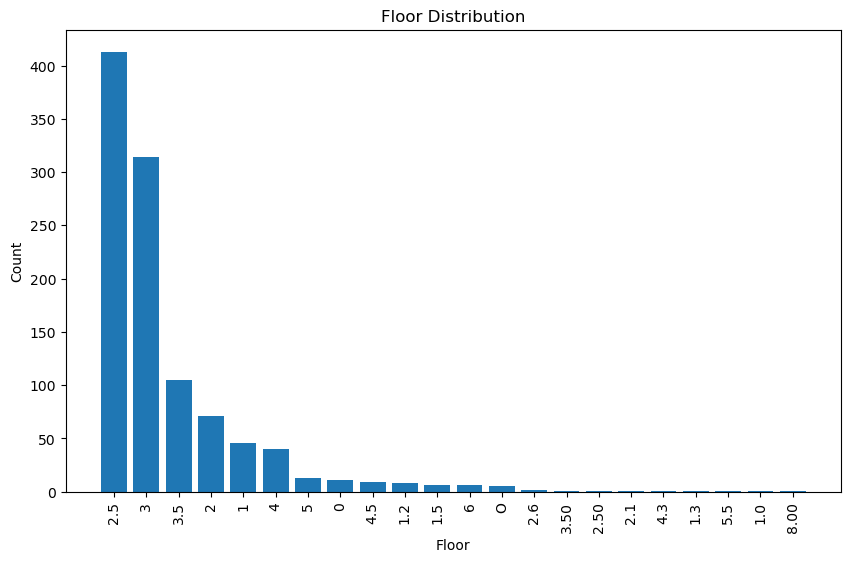

In [114]:
import matplotlib.pyplot as plt

floor_counts = dropped['Floor'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(floor_counts.index, floor_counts.values)
plt.xlabel('Floor')
plt.ylabel('Count')
plt.title('Floor Distribution')
plt.xticks(rotation='vertical')
plt.show()


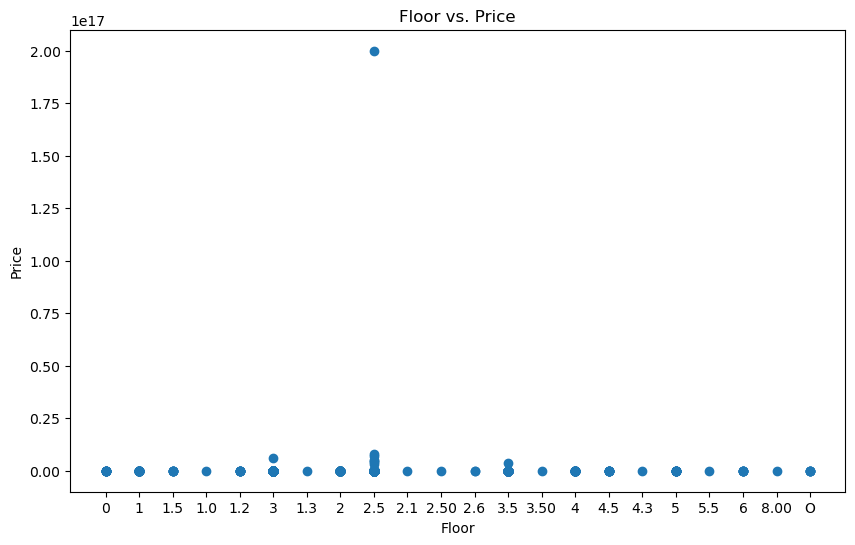

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(dropped['Floor'], dropped['Price'])
plt.xlabel('Floor')
plt.ylabel('Price')
plt.title('Floor vs. Price')
plt.show()


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      3408 non-null   float64
 1   Address    3408 non-null   object 
 2   Floor      3153 non-null   object 
 3   Bathroom   3077 non-null   object 
 4   Bedroom    3071 non-null   object 
 5   Land       3244 non-null   object 
 6   Road       3244 non-null   float64
 7   Land Mark  1196 non-null   object 
dtypes: float64(2), object(6)
memory usage: 213.1+ KB


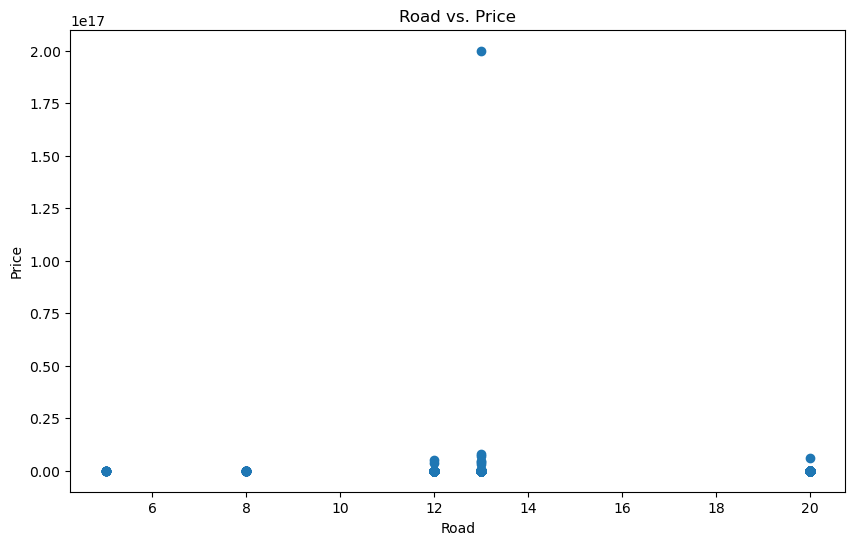

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(dropped['Road'], dropped['Price'])
plt.xlabel('Road')
plt.ylabel('Price')
plt.title('Road vs. Price')
plt.show()


In [119]:
dropped['Floor'] = dropped['Floor'].astype(float)


ValueError: could not convert string to float: 'O'

### Removing o from Floor

In [120]:
dropped = dropped[dropped['Floor'] != 'O']

In [122]:
dropped.loc[:, 'Floor'] = dropped['Floor'].astype(float)


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      3408 non-null   float64
 1   Address    3408 non-null   object 
 2   Floor      3153 non-null   object 
 3   Bathroom   3077 non-null   object 
 4   Bedroom    3071 non-null   object 
 5   Land       3244 non-null   object 
 6   Road       3244 non-null   float64
 7   Land Mark  1196 non-null   object 
dtypes: float64(2), object(6)
memory usage: 213.1+ KB


In [129]:
correlation = dropped['Price'].corr(dropped['Road'])
correlation

-0.010375017170336856

In [130]:
dropped.to_csv('cleanerfloor_hamrobazar.csv')

,Price,Address,Floor,Bathroom,Bedroom,Land,Road,Land Mark
5,31500000.00,"Kuti Galli, माइजु बहल, चाबहिल",0.00,4,6,1369,13.00,chabahil
13,39900000.00,"Budhanilkantha, Kathmandu",0.00,4,6,0,12.00,budhanilkantha
17,27500000.00,"Milijuli Tol, चप्पल कारखाना",0.00,3,4,0,13.00,bansbari
21,16500000.00,"Maulo Gade Pokhari, Chandragiri Municipality, ...",0.00,0,0,855.625,13.00,0
33,13000000.00,"Ranibari (Samakhusi), Kathmandu",0.00,0.0,0.0,1369,5.00,0
...,...,...,...,...,...,...,...,...
3113,32500000.00,"lan station, Inabaha Marg, कमलाक्षी, बागबजार, ...",6.00,5,6,684.5,13.00,Commercial
3115,27000000.00,"Manjushri Marg, पिपल बोट, बानेश्वर",6.00,8.0,22.0,1197.87,8.00,Puja pratishtha marg
3123,17000000.00,"Dhwakhache Marg, Pyaphal,",6.00,5,5,1026.75,20.00,3
3125,75000000.00,"Childrens Eternal Academy, Balaju-Sourkhutte S...",6.00,4.0,5.0,1711.25,13.00,Good
